# Python Panamá Junio 2024

## Usando Servicios Administrados de AI de AWS con Python y Boto3

![Python Panamá](images/pythonpanama.png)

## Repositorio

### <https://gitlab.com/soldavid/pythonpanama20240618>

![Código QR del Repositorio](images/qrpythonpanama20240618.gif)

## David Sol

![David Sol](images/davidsol.jpg)

Nacido y viviendo en la Gran Ciudad de México. Casado con dos hijos y un maravilloso nieto.

SRE @ Wizeline. AWS Community Builder.

Twitter: [@soldavidcloud](https://twitter.com/soldavidcloud)

Linkedin: <https://www.linkedin.com/in/soldavidcloud/>

- Libro Favorito: **The Hitchhiker's Guide To the Galaxy (Douglas Adams)**
- Comic Favorito: **Planetary (Ellis/Cassaday)**
- Película Favorita: **Flash Gordon (Mike Hodges 1980)**

![Favoritos](images/favorites.jpeg)

## Servicios de Machine Learning en AWS

![AWS ML Stack](images/aws-ai-ml-stack.jpg)

## Entremos en materia


In [1]:
import base64
import json
import os
import random

# Este modulo es para desplegar estructuras de datos de forma amigable
from pprint import pprint

# Este modulo se encarga de la trabajr con imagenes
from PIL import Image, ImageDraw, ImageFont

# Este es el modulo que se encarga de la comunicacion con AWS
import boto3

## BOTO3

Boto3 es la libreria de acceso al API de AWS para Python (SDK).

Primero creamos una **sesión** (la cual no se "abre" hasta que la utilizamos). Necesitamos autenticarnos a AWS _(¡La seguridad primero!)_.

En mi caso voy a utilizar [un perfil ya definido en mi computadora](https://boto3.amazonaws.com/v1/documentation/api/latest/guide/credentials.html).

En el perfil se define que la región de AWS por omisión, que en este caso es us-west-2 (Oregon).

## Advertencia: NUNCA debes almacenar credenciales en un repositorio. No debes guardar el Notebook con credenciales.


In [2]:
aws_session = boto3.Session(profile_name="pythonpanama")

In [4]:
pprint(aws_session.client("sts").get_caller_identity())

print(f"Región: {aws_session.region_name}")

{'Account': '098684151975',
 'Arn': 'arn:aws:sts::098684151975:assumed-role/AWSReservedSSO_PowerUserAccess_d40714c69610f2e7/pythonpanama',
 'ResponseMetadata': {'HTTPHeaders': {'content-length': '478',
                                      'content-type': 'text/xml',
                                      'date': 'Wed, 19 Jun 2024 01:26:58 GMT',
                                      'x-amzn-requestid': '06d7f576-2fbd-4fb4-bff7-e5f06d0e7cda'},
                      'HTTPStatusCode': 200,
                      'RequestId': '06d7f576-2fbd-4fb4-bff7-e5f06d0e7cda',
                      'RetryAttempts': 0},
 'UserId': 'AROARN6QIVCT53ZBLU7Y2:pythonpanama'}
Región: us-west-2


## Rekognition

![Rekognition](images/rekognition.png)

Empezamos con el servicio de Vision, Rekognition.

El procedimiento con todos los servicios de AWS es primero crear un cliente de Boto3.


In [5]:
rekognition_client = aws_session.client("rekognition")

Elegimos la imagen a utilizar.

[_De la película Unfinished Business (2015)_](https://www.imdb.com/title/tt2358925/)


In [6]:
image_name = "images/sample.jpg"

Leemos la imagen.


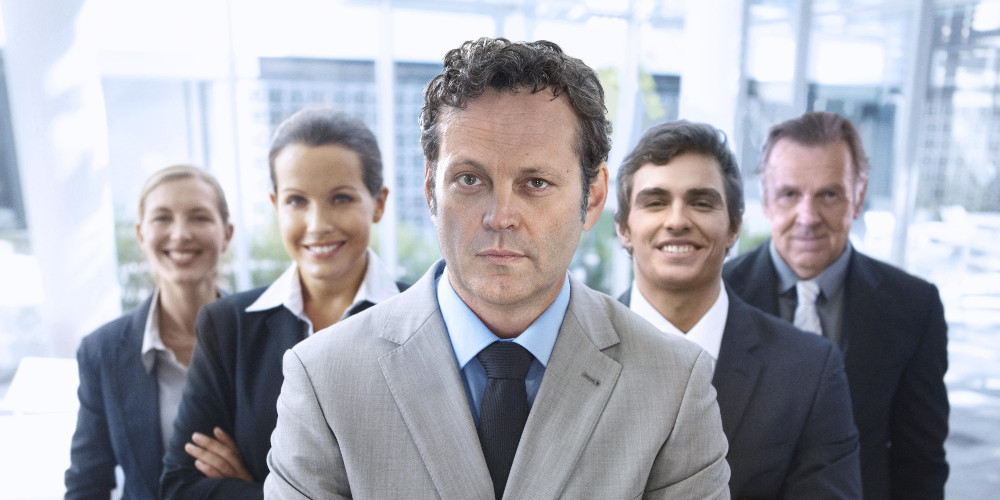

In [7]:
image_display = Image.open(image_name)
display(image_display)

Regoknition nos deja hacer muchas cosas, en este ejemplo vamos a identificar objetos en la imagen _(tagging)_.

Leemos la imagen como bytes y la enviamos a AWS para su analisis.


In [8]:
with open(image_name, "rb") as image:
    response = rekognition_client.detect_labels(Image={"Bytes": image.read()})

La respuesta es un dicionario de Python.


In [9]:
pprint(response, depth=2)

{'LabelModelVersion': '3.0',
 'Labels': [{...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...},
            {...}],
 'ResponseMetadata': {'HTTPHeaders': {...},
                      'HTTPStatusCode': 200,
                      'RequestId': '740177c0-5a78-4c77-839f-86c1a515d05b',
                      'RetryAttempts': 0}}


In [10]:
pprint(response["Labels"][0:4], depth=2)

[{'Aliases': [...],
  'Categories': [...],
  'Confidence': 99.699951171875,
  'Instances': [],
  'Name': 'Clothing',
  'Parents': []},
 {'Aliases': [],
  'Categories': [...],
  'Confidence': 99.699951171875,
  'Instances': [],
  'Name': 'Formal Wear',
  'Parents': []},
 {'Aliases': [],
  'Categories': [...],
  'Confidence': 99.699951171875,
  'Instances': [...],
  'Name': 'Suit',
  'Parents': [...]},
 {'Aliases': [],
  'Categories': [...],
  'Confidence': 99.53180694580078,
  'Instances': [...],
  'Name': 'Adult',
  'Parents': [...]}]


In [13]:
pprint(response["Labels"][2])

{'Aliases': [],
 'Categories': [{'Name': 'Apparel and Accessories'}],
 'Confidence': 99.699951171875,
 'Instances': [{'BoundingBox': {'Height': 0.5283690690994263,
                                'Left': 0.7211312651634216,
                                'Top': 0.4713396728038788,
                                'Width': 0.22994409501552582},
                'Confidence': 99.699951171875},
               {'BoundingBox': {'Height': 0.44376036524772644,
                                'Left': 0.6181567311286926,
                                'Top': 0.554985523223877,
                                'Width': 0.24710991978645325},
                'Confidence': 99.5663833618164},
               {'BoundingBox': {'Height': 0.4830222725868225,
                                'Left': 0.26048222184181213,
                                'Top': 0.5168457627296448,
                                'Width': 0.4732782244682312},
                'Confidence': 99.28506469726562},
               {'Bo

Separemos solo los labels en donde hay objetos detectados (los demás son categorias).


In [14]:
objetos_detectados = []

for label in response["Labels"]:
    if len(label["Instances"]) >= 1:
        print(label["Name"])
        objetos_detectados.append(label)

print(f"Total de tipo de objetos = {len(objetos_detectados)}")

Suit
Adult
Male
Man
Person
Female
Woman
Tie
Total de tipo de objetos = 8


Ahora empieza la diversión...


In [15]:
# Preparamos el canvas y el tipo de letra
font = ImageFont.truetype("Sudo-Bold.ttf", size=20)
draw = ImageDraw.Draw(image_display)
w, h = image_display.size

In [16]:
# Obtenemos la information de un tipo de objetos
nombre = objetos_detectados[0]["Name"]
print(f"Tipo de Objeto: {nombre}")
instancia = objetos_detectados[0]["Instances"][0]
print("Instancia: ")
pprint(instancia)
bbox = instancia["BoundingBox"]

# Transforma las coordenadas de porcentuales a absolutas
x0 = int(bbox["Left"] * w)
y0 = int(bbox["Top"] * h)
x1 = x0 + int(bbox["Width"] * w)
y1 = y0 + int(bbox["Height"] * h)
print("Coordenadas:", x0, y0, x1, y1)

Tipo de Objeto: Suit
Instancia: 
{'BoundingBox': {'Height': 0.5283690690994263,
                 'Left': 0.7211312651634216,
                 'Top': 0.4713396728038788,
                 'Width': 0.22994409501552582},
 'Confidence': 99.699951171875}
Coordenadas: 721 235 950 499


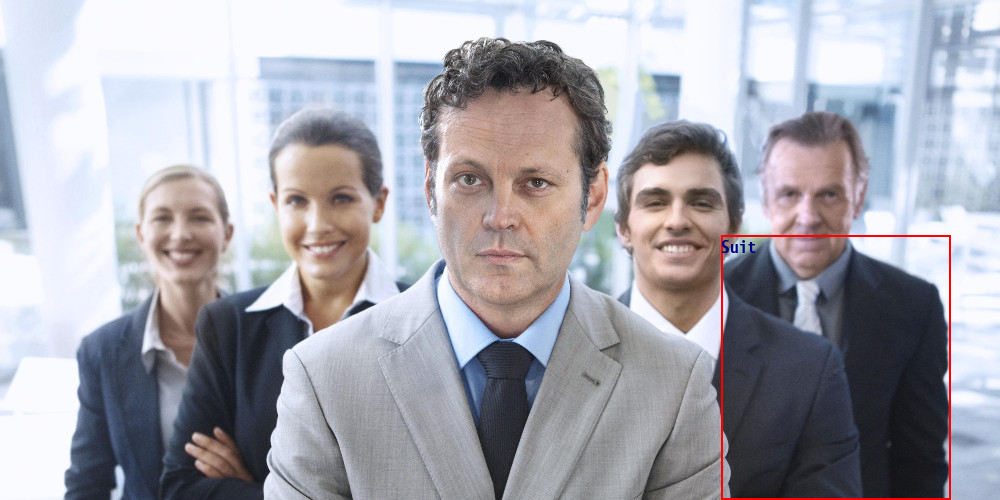

In [17]:
# Dibujamos un rectángulo y el nombre sobre el canvas
draw.rectangle((x0, y0, x1, y1), outline=(255, 0, 0), width=2)
draw.text((x0, y0), nombre, font=font, fill=(0, 0, 128))
display(image_display)

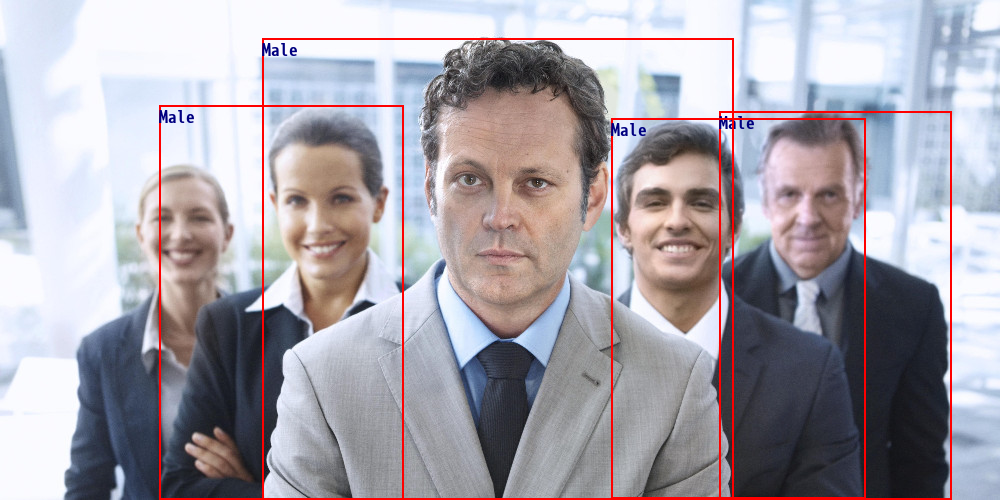

In [20]:
# Ahora hagamoslo para todas las instancias de un tipo de objeto
# Podemos variar el índice para ver diferentes tipos de objeto
indice = 2
image_display = Image.open(image_name)
draw = ImageDraw.Draw(image_display)
tipo_objeto = objetos_detectados[indice]
nombre = tipo_objeto["Name"]
for instancia in tipo_objeto["Instances"]:
    bbox = instancia["BoundingBox"]
    x0 = int(bbox["Left"] * w)
    y0 = int(bbox["Top"] * h)
    x1 = x0 + int(bbox["Width"] * w)
    y1 = y0 + int(bbox["Height"] * h)
    draw.rectangle((x0, y0, x1, y1), outline=(255, 0, 0), width=2)
    draw.text((x0, y0), nombre, font=font, fill=(0, 0, 128))

display(image_display)

## Polly

We can also synthesize audio.

![AWS Polly](images/polly.jpg)


In [31]:
from botocore.exceptions import BotoCoreError, ClientError
from contextlib import closing
import os
import sys
import subprocess
from tempfile import gettempdir

polly = aws_session.client("polly")

try:
    # Solicitamos la síntesis de audio
    response = polly.synthesize_speech(
        Text="Encontré un cuarto fantasma, ¡que miedo me da!",
        OutputFormat="mp3",
        VoiceId="Enrique",
    )
    # Tambien podemos probar con Lupe o Lucia
    # Todos los lenguajes y voces están documentados en https://docs.aws.amazon.com/polly/latest/dg/voicelist.html
except (BotoCoreError, ClientError) as error:
    # El servicio respondió un error
    print(error)

In [32]:
# Salvamos el stream de audio de la respuesta a un archivo.
output = ""
if "AudioStream" in response:
    with closing(response["AudioStream"]) as stream:
        output = os.path.join(gettempdir(), "saludos.mp3")
        try:
            with open(output, "wb") as file:
                file.write(stream.read())
        except IOError as error:
            print(error)
            sys.exit(-1)
else:
    print("Could not stream audio")

# Reproducimos el audio
if sys.platform == "win32":
    # The following works on Windows
    os.startfile(output)  # type: ignore
else:
    opener = "open" if sys.platform == "darwin" else "xdg-open"
    subprocess.call([opener, output])
print(output)

/var/folders/97/gsdyvg5s4cx9h0_p_g19rqqc0000gn/T/saludos.mp3


## Transcribe

Y podemos hacer lo contrario, transcribir audio a texto.

Nuestro archivo de ejemplo está en (https://david21-publica.s3.us-west-2.amazonaws.com/ejemplo.mp3).

![Transcribe Logo](images/transcribe.jpg)


In [33]:
import time

transcribe_client = aws_session.client("transcribe")

transcription_job_name = "pythonpanama-00-debe-ser-un-valor-unico-cada-vez"
transcript_uri = ""

transcribe_client.start_transcription_job(
    TranscriptionJobName=transcription_job_name,
    Media={"MediaFileUri": "s3://david21-publica/ejemplo.mp3"},
    MediaFormat="mp3",
    LanguageCode="es-ES",
)

# Es un proceso asíncrono, y hay que esperar a que termine
max_tries = 60
while max_tries > 0:
    max_tries -= 1
    job = transcribe_client.get_transcription_job(
        TranscriptionJobName=transcription_job_name
    )
    job_status = job["TranscriptionJob"]["TranscriptionJobStatus"]
    if job_status in ["COMPLETED", "FAILED"]:
        print(f"El estado de la transcripción es: {job_status}.")
        if job_status == "COMPLETED":
            transcript_uri = job["TranscriptionJob"]["Transcript"]["TranscriptFileUri"]
            print(f"Download the transcript from\n" f"\t{transcript_uri}.")
        break
    else:
        print(f"Seguimos esperando. El estado actual es {job_status}.")
    time.sleep(10)

Seguimos esperando. El estado actual es IN_PROGRESS.
Seguimos esperando. El estado actual es IN_PROGRESS.
Seguimos esperando. El estado actual es IN_PROGRESS.
Seguimos esperando. El estado actual es IN_PROGRESS.
El estado de la transcripción es: COMPLETED.
Download the transcript from
	https://s3.us-west-2.amazonaws.com/aws-transcribe-us-west-2-prod/098684151975/pythonpanama-00-debe-ser-un-valor-unico-cada-vez/1f74f6de-3aa7-44a6-8163-3b9aff0ebc25/asrOutput.json?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEHgaCXVzLXdlc3QtMiJHMEUCIQDavdXFZyBVxYvwwqvuxODfWAus9JQ%2Brz5Q2OKieTUSfQIgfuOkCV6dbi5vvkysh79cf6T5N7oIfhinmGPn5OGi6fcqsgUIIRAEGgwwODAyNDgzMjIyMDYiDDYnf%2BelDqIKTi%2BMoCqPBRn%2B7fLsVTYNmkOLxEIbLfgt6Ula6VzpDqaEEe9zYcIKasxmPc%2BcuSgncN99wiIg4rlXaHtyiALXbnzlUpp6PJR9bhtAEnZnLjVvY2IZIiZbW3j0vnUVF27We2es1YcFIenrePnxlcrKckj3Z6VQFNzZrQvQBBfGzKTSnHiIavlNbcgkQK%2FnXPSxr%2FYsxkEaRs8NAQsgTnsa9c8jJvBFE%2BDL518BT0li%2F3BRNt%2Fn4CUfIAwBrHvRBycGRuxxYWlDpC2%2B9kX4TN6VcHKTN0IgLvAXDe3p4PsHDkzcJdZVM9bL5R2mxlYEb3M

In [34]:
import requests

response = requests.get(transcript_uri)

pprint(response.json(), depth=2)

{'accountId': '098684151975',
 'jobName': 'pythonpanama-00-debe-ser-un-valor-unico-cada-vez',
 'results': {'items': [...], 'transcripts': [...]},
 'status': 'COMPLETED'}


In [35]:
print(response.json()["results"]["transcripts"][0]["transcript"])

la inteligencia artificial y el aprendizaje automatizado. Es un tópico muy interesante.


In [36]:
pprint(response.json()["results"]["items"])

[{'alternatives': [{'confidence': '0.999', 'content': 'la'}],
  'end_time': '0.239',
  'start_time': '0.1',
  'type': 'pronunciation'},
 {'alternatives': [{'confidence': '0.997', 'content': 'inteligencia'}],
  'end_time': '0.98',
  'start_time': '0.25',
  'type': 'pronunciation'},
 {'alternatives': [{'confidence': '0.995', 'content': 'artificial'}],
  'end_time': '1.58',
  'start_time': '0.99',
  'type': 'pronunciation'},
 {'alternatives': [{'confidence': '0.999', 'content': 'y'}],
  'end_time': '1.7',
  'start_time': '1.59',
  'type': 'pronunciation'},
 {'alternatives': [{'confidence': '0.997', 'content': 'el'}],
  'end_time': '1.799',
  'start_time': '1.71',
  'type': 'pronunciation'},
 {'alternatives': [{'confidence': '0.996', 'content': 'aprendizaje'}],
  'end_time': '2.5',
  'start_time': '1.809',
  'type': 'pronunciation'},
 {'alternatives': [{'confidence': '0.982', 'content': 'automatizado'}],
  'end_time': '3.359',
  'start_time': '2.509',
  'type': 'pronunciation'},
 {'alterna

## Translate

También podemos traducir entre lenguajes.

![Translate Logo](images/translate.png)


In [41]:
translate = aws_session.client(service_name="translate")

# Los lenguajes disponibles están documentados en https://docs.aws.amazon.com/translate/latest/dg/what-is-languages.html.

result = translate.translate_text(
    Text="Gracias por asistir al Meetup Python Panamá. Recuerden: ¡Python es amor!",
    SourceLanguageCode="es",
    TargetLanguageCode="pt",
)

print("Traducción: " + result.get("TranslatedText"))

Traducción: Obrigado por participar do Python Panama Meetup. Lembre-se: Python é amor!


## Comprehend

Mas interesante, analizar el texto para encontrar su significado.

![Comprehend](images/comprehend.png)


In [42]:
class ComprehendDetect:
    """Encapsulates Comprehend detection functions."""

    def __init__(self, comprehend_client):
        """
        :param comprehend_client: A Boto3 Comprehend client.
        """
        self.comprehend_client = comprehend_client

    def detect_languages(self, text):
        """
        Detects languages used in a document.

        :param text: The document to inspect.
        :return: The list of languages along with their confidence scores.
        """
        try:
            response = self.comprehend_client.detect_dominant_language(Text=text)
            languages = response["Languages"]
        except ClientError:
            print("Couldn't detect languages.")
            raise
        else:
            return languages

    def detect_entities(self, text, language_code):
        """
        Detects entities in a document. Entities can be things like people and places
        or other common terms.

        :param text: The document to inspect.
        :param language_code: The language of the document.
        :return: The list of entities along with their confidence scores.
        """
        try:
            response = self.comprehend_client.detect_entities(
                Text=text, LanguageCode=language_code
            )
            entities = response["Entities"]
        except ClientError:
            print("Couldn't detect entities.")
            raise
        else:
            return entities

    def detect_key_phrases(self, text, language_code):
        """
        Detects key phrases in a document. A key phrase is typically a noun and its
        modifiers.

        :param text: The document to inspect.
        :param language_code: The language of the document.
        :return: The list of key phrases along with their confidence scores.
        """
        try:
            response = self.comprehend_client.detect_key_phrases(
                Text=text, LanguageCode=language_code
            )
            phrases = response["KeyPhrases"]
        except ClientError:
            print("Couldn't detect phrases.")
            raise
        else:
            return phrases

    def detect_pii(self, text, language_code):
        """
        Detects personally identifiable information (PII) in a document. PII can be
        things like names, account numbers, or addresses.

        :param text: The document to inspect.
        :param language_code: The language of the document.
        :return: The list of PII entities along with their confidence scores.
        """
        try:
            response = self.comprehend_client.detect_pii_entities(
                Text=text, LanguageCode=language_code
            )
            entities = response["Entities"]
        except ClientError:
            print("Couldn't detect PII entities.")
            raise
        else:
            return entities

    def detect_sentiment(self, text, language_code):
        """
        Detects the overall sentiment expressed in a document. Sentiment can
        be positive, negative, neutral, or a mixture.

        :param text: The document to inspect.
        :param language_code: The language of the document.
        :return: The sentiments along with their confidence scores.
        """
        try:
            response = self.comprehend_client.detect_sentiment(
                Text=text, LanguageCode=language_code
            )
        except ClientError:
            print("Couldn't detect sentiment.")
            raise
        else:
            return response

    def detect_syntax(self, text, language_code):
        """
        Detects syntactical elements of a document. Syntax tokens are portions of
        text along with their use as parts of speech, such as nouns, verbs, and
        interjections.

        :param text: The document to inspect.
        :param language_code: The language of the document.
        :return: The list of syntax tokens along with their confidence scores.
        """
        try:
            response = self.comprehend_client.detect_syntax(
                Text=text, LanguageCode=language_code
            )
            tokens = response["SyntaxTokens"]
        except ClientError:
            print("Couldn't detect syntax.")
            raise
        else:
            return tokens

In [47]:
comprehend = ComprehendDetect(aws_session.client("comprehend"))

sample_text = """
Oh, Caroline
Get it right this time
Always on my mind
I wanna get it right
But you're on my mind
"""

demo_size = 5

print("Detectando Lenguaje.")
languages = comprehend.detect_languages(sample_text)
pprint(languages)
lang_code = languages[0]["LanguageCode"]

print("Detectando Entidades.")
entities = comprehend.detect_entities(sample_text, lang_code)
print(f"Las primeras {demo_size} entidades son:")
pprint(entities[:demo_size])

print("Detectando Frases Importantes.")
phrases = comprehend.detect_key_phrases(sample_text, lang_code)
print(f"Las primeras {demo_size} frases importantes son:")
pprint(phrases[:demo_size])

print("Detectando Sentimiento.")
sentiment = comprehend.detect_sentiment(sample_text, lang_code)
print(f"Sentimiento: {sentiment['Sentiment']}")
print("Calificación:")
pprint(sentiment["SentimentScore"])

print("Analizando Sintaxis.")
syntax_tokens = comprehend.detect_syntax(sample_text, lang_code)
print(f"Los primeros {demo_size} elementos son:")
pprint(syntax_tokens[:demo_size])

Detectando Lenguaje.
[{'LanguageCode': 'en', 'Score': 0.9969178438186646}]
Detectando Entidades.
Las primeras 5 entidades son:
[{'BeginOffset': 5,
  'EndOffset': 13,
  'Score': 0.9988722205162048,
  'Text': 'Caroline',
  'Type': 'PERSON'}]
Detectando Frases Importantes.
Las primeras 5 frases importantes son:
[{'BeginOffset': 5,
  'EndOffset': 13,
  'Score': 0.9955602884292603,
  'Text': 'Caroline'},
 {'BeginOffset': 27,
  'EndOffset': 36,
  'Score': 0.9991115927696228,
  'Text': 'this time'},
 {'BeginOffset': 47,
  'EndOffset': 54,
  'Score': 0.9999028444290161,
  'Text': 'my mind'}]
Detectando Sentimiento.
Sentimiento: NEUTRAL
Calificación:
{'Mixed': 0.00047392991837114096,
 'Negative': 0.14377984404563904,
 'Neutral': 0.4759620726108551,
 'Positive': 0.37978410720825195}
Analizando Sintaxis.
Los primeros 5 elementos son:
[{'BeginOffset': 1,
  'EndOffset': 3,
  'PartOfSpeech': {'Score': 0.7578811049461365, 'Tag': 'CCONJ'},
  'Text': 'Oh',
  'TokenId': 1},
 {'BeginOffset': 3,
  'EndOff

# Bedrock

También podemos hacer Generative AI, con el servicio Amazon Bedrock.

Necesitas habilitar acceso al modelo que quieras utilizar, en este caso, Titan Image Generator G1.


In [48]:
# Crea el cliente.
client = aws_session.client("bedrock-runtime", region_name="us-west-2")

# Escoje el modelo, en este caso, Titan Image Generator G1.
model_id = "amazon.titan-image-generator-v1"

# ¿Qué imagen queremos generar?
prompt = "A ship crossing the Panamá channel."

# Genera una semilla al azar.
seed = random.randint(0, 2147483647)

# Prepara los datos de la petición según lo que requiere el modelo Titan Image Generator G1.
native_request = {
    "taskType": "TEXT_IMAGE",
    "textToImageParams": {"text": prompt},
    "imageGenerationConfig": {
        "numberOfImages": 1,
        "quality": "standard",
        "cfgScale": 8.0,
        "height": 512,
        "width": 512,
        "seed": seed,
    },
}

# Convierte los datos de la peticion en JSON.
request = json.dumps(native_request)

In [49]:
# Hace la petición.
response = client.invoke_model(
    modelId=model_id,
    body=request,
)

ValidationException: An error occurred (ValidationException) when calling the InvokeModel operation: Operation not allowed

In [ ]:
# Decode the response body.
model_response = json.loads(response["body"].read())

# Extract the image data.
base64_image_data = model_response["images"][0]

# Save the generated image to a local folder.
i, output_dir = 1, "output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
while os.path.exists(os.path.join(output_dir, f"titan_{i}.png")):
    i += 1

image_data = base64.b64decode(base64_image_data)

image_path = os.path.join(output_dir, f"titan_{i}.png")
with open(image_path, "wb") as file:
    file.write(image_data)

print(f"The generated image has been saved to {image_path}")

## Sagemaker

![Sagemaker Logo](images/sagemaker.jpg)

También hay servicios que te dan acceso a un ambiente de trabajo de Machine Learning completo, incluyendo almacenamiento de datos, securidad, flujos de trabajo automatizados, recursos de cómputo bajo demanda y despliegue de modelos.

![MLOps Platform](images/MLOps%20Platform.jpeg)

En particular hay un servicio gratuito para Aprendizaje Automatizado y realización de experimientos simples.

[Amazon Sagemaker Studio Lab](https://studiolab.sagemaker.aws)

## Hugging Face

Les recomiendo revisar este recurso: [Hugging Face](https://huggingface.co). Es una colección de algoritmos, modelos y herramientas de código abierto para Machine Learning e Inteligencia Artificial.

![Hugging Face Logo](images/huggingface-logo.png)

## Otros proveedores de nube.

Claro, AWS no es el único proveedor de nube. También hay ofertas muy completas de **Google Cloud Platform** and **Microsoft Azure**.

También hay proveedores _pequeños_ que podemos utilizar, y casi todos con un ambiente gratuito. Algunos de ellos son:

- [Dataiku](https://www.dataiku.com/product/)
- [Google Colab](https://colab.research.google.com)
- [JetBrains Datalore](https://datalore.jetbrains.com)
- [Kaggle](https://www.kaggle.com)
- [Paperspace](https://www.paperspace.com)

Y, por supuesto, [Binder](https://mybinder.org), si lo quieren poder ver y ejecutar Jupyter Notebooks.

## Gracias

## Repositorio

### <https://gitlab.com/soldavid/pythonpanama20240618>

![Código QR del Repositorio](images/qrpythonpanama20240618.gif)
